In [83]:
# We'll need scipy in this notebook. Let's import it already here
import scipy

Embeddings Arithmetics
====================

Something interesting about the vector embeddings is that you can perform some semantic arithmetics between the vectors. The most common example is something like (from [the Wikipedia page on Language Models](https://en.wikipedia.org/wiki/Language_model)):

$$
v(king) - v(male) + v(female) \approx v(queen)
$$

where $v()$ is a function that receives a word and outputs a vector.

### Using Flair

Let's take a look at how to implement that in Python. For that, we will use the pretrained [Glove vectors](https://nlp.stanford.edu/projects/glove/), available in the Stanford NLP webpage. We will use the `flair` Python library to access them without having to download anything by hand. For that, you'll need to run, in the terminal,

    pip install flair

The code below assumes that you've already done that. Let's first import the WordEmbeddings from flair. You can get more information on how `flair` works by reading [their tutorial](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_1_BASICS.md). A lot of this text is STRONGLY based on their tutorial. Go check it there =)

In [1]:
from flair.embeddings import WordEmbeddings

glove_embedding = WordEmbeddings('glove')

/home/gamboa/venvs/nlpenv/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


2022-07-08 11:09:48,512 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp2_4m1qaf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000128/160000128 [00:46<00:00, 3448428.69B/s]

2022-07-08 11:10:35,002 copying /tmp/tmp2_4m1qaf to cache at /home/gamboa/.flair/embeddings/glove.gensim.vectors.npy


2022-07-08 11:10:35,058 removing temp file /tmp/tmp2_4m1qaf
2022-07-08 11:10:35,155 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp4lnm6g2c


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21494764/21494764 [00:03<00:00, 6852235.46B/s]

2022-07-08 11:10:38,383 copying /tmp/tmp4lnm6g2c to cache at /home/gamboa/.flair/embeddings/glove.gensim
2022-07-08 11:10:38,393 removing temp file /tmp/tmp4lnm6g2c


This will load the Glove vectors; or also download the embeddings, if you are running this for the first time.

In `flair`, to be able to manipulate our texts, we need to create an object of the type Sentence. Let's do this and pass a dummy sentence, just to see how it works:

In [2]:
from flair.data import Sentence

sentence = Sentence("The sky is blue")

In [3]:
print(sentence)

Sentence: "The sky is blue"   [− Tokens: 4]


If we want to tokenize the sentence, we set the argument `use_tokenizer`:

In [4]:
sentence = Sentence("The sky isn't blue (right?).", use_tokenizer=True)

In [5]:
print(sentence)

Sentence: "The sky is n't blue ( right ?) ."   [− Tokens: 9]


Notice how the tokenizer is not super great, and couldn't separate the `?` and the `)` from each other. You can actually configure the tokenizer; but we are not interested in this at this point. Instead, what we want were the word vectors. How do we get the word vectors associated with the words in our sentence?

To understand that, we will need to understand a little better how the object `sentence` works. If we try to access the elements of `sentence` as if it were a list, it will print the tokens:

In [6]:
sentence[1]

Token: 2 sky

Each of these elements of the `Sentence` object is also an object, of the type `Token`:

In [7]:
type(sentence[1])

flair.data.Token

Keep this information in mind. It will be important in a second.

To get the vectors that we so much want, we just need to call the function `embed()` associated with our `glove_embedding` variable. That is:

In [8]:
glove_embedding.embed(sentence)

[Sentence: "The sky is n't blue ( right ?) ."   [− Tokens: 9]]

This will change each of the `Token` elements of the `Sentence` object, adding a new attribute `.embedding` to them:

In [9]:
sentence[1].embedding

tensor([-1.9728e-01, -1.9332e-01,  4.7003e-01, -2.0349e-01,  3.5320e-01,
        -1.9670e-03, -1.6061e-01,  3.4376e-01, -4.7123e-01, -1.3805e-01,
         4.0847e-01, -2.7540e-01,  2.6019e-01, -2.3646e-01,  3.3464e-01,
        -1.0288e+00,  2.6658e-01,  2.6534e-01,  3.3474e-01,  3.5679e-02,
        -4.6133e-01, -1.1427e-01, -3.8717e-01, -3.8679e-01,  1.2251e+00,
         5.4778e-01,  4.9220e-01,  5.4931e-01, -4.1442e-01, -4.0919e-01,
        -3.7017e-03, -1.1530e-01, -3.0676e-01,  2.5770e-01,  5.2855e-01,
         1.6689e-01, -5.7968e-03,  4.0645e-01,  5.3229e-01, -3.0340e-01,
        -6.4272e-01, -9.6867e-02, -1.0288e+00,  5.9033e-01,  2.5347e-01,
         4.0188e-01, -3.5991e-01,  6.8056e-01,  3.9156e-01, -6.9845e-01,
        -1.1703e-01,  3.0484e-01,  4.1278e-01,  1.1828e+00,  2.7879e-02,
        -2.5020e+00,  5.0651e-01,  9.9179e-01,  1.3479e+00,  2.9018e-01,
         2.9117e-01,  8.1868e-01, -7.0857e-01, -4.1689e-01, -1.4474e-01,
         7.1202e-01,  3.3466e-01, -3.9393e-01, -4.2

### Semantic Arithmetics

Let's check out that one example of "embedding arithmetics" that everyone talks about. To check if it works, we will use the following procedure. First we will get an approximation for the word we are looking for:

$$
\tilde{queen} = king - male + female
$$

If it is true that $\tilde{queen} \approx queen$, then it should also be true that $\tilde{queen} - queen \approx 0$. We will check if this is really the case

In [44]:
# First we declare the words
king = Sentence('king')
queen = Sentence('queen')
male = Sentence('male')
female = Sentence('female')

In [45]:
# Then we give them the vectors
glove_embedding.embed(king)
glove_embedding.embed(queen)
glove_embedding.embed(male)
glove_embedding.embed(female)

[Sentence: "female"   [− Tokens: 1]]

Now we can finally do our comparisons:

In [46]:
tilde_queen = king[0].embedding - male[0].embedding + female[0].embedding

In [47]:
tilde_queen - queen[0].embedding

tensor([-8.7801e-03, -2.6444e-01, -4.8296e-01, -5.7402e-01,  3.4434e-01,
        -1.8135e-01, -1.3701e-01, -1.2899e+00, -7.7830e-02, -8.3858e-01,
         2.2106e-01, -3.1503e-01,  8.2960e-02, -3.4885e-01,  1.9595e-01,
        -2.2722e-01, -2.6548e-02, -7.6250e-01, -8.1788e-01, -9.6460e-02,
         3.6625e-01, -3.9410e-01, -2.2320e-01, -1.3823e-01, -2.4907e-01,
        -3.2222e-01,  2.6245e-01,  6.9979e-01, -9.2070e-02,  5.1306e-01,
        -2.4856e-01,  1.9027e-01, -3.0908e-01,  1.0744e-01, -7.7501e-01,
         5.1170e-02,  7.3250e-02,  2.1670e-01,  5.4191e-01,  1.1901e-03,
        -5.3394e-01,  7.6740e-01,  6.0308e-01,  3.9460e-02, -6.2562e-01,
        -1.0116e-01, -1.2068e-01, -4.9498e-01, -2.2435e-01, -2.8963e-01,
        -5.3829e-01,  8.6375e-02,  2.3814e-01, -4.4320e-02,  6.4162e-02,
        -3.0080e-01,  2.2289e-01,  4.3978e-01,  4.0456e-01,  3.8896e-01,
         4.3990e-02, -4.4450e-01,  2.9623e-01, -2.1024e-01,  3.4705e-01,
        -4.8003e-01,  1.5278e-01,  8.8486e-02, -8.3

Well... it doesn't seem like this actually worked as expected =/

Maybe we can try with something else:

In [48]:
# First we declare the words
hero = Sentence('hero')
heroine = Sentence('heroine')
male = Sentence('male')
female = Sentence('female')

In [49]:
# Then we give them the vectors
glove_embedding.embed(hero)
glove_embedding.embed(heroine)
glove_embedding.embed(male)
glove_embedding.embed(female)

[Sentence: "female"   [− Tokens: 1]]

In [50]:
tilde_heroine = hero[0].embedding - male[0].embedding + female[0].embedding

In [51]:
tilde_heroine - heroine[0].embedding

tensor([-6.8494e-01,  2.6001e-01, -4.1699e-03, -2.1073e-01,  3.1748e-01,
        -6.3154e-01, -2.2054e-02, -1.0251e+00, -5.6639e-01, -2.4708e-01,
         3.1114e-01, -8.2418e-01,  1.8590e-02, -2.4112e-01,  4.5808e-01,
        -2.9419e-01,  7.3935e-01, -3.5520e-02, -7.9201e-01,  1.0256e-01,
         2.9046e-01,  2.1032e-01, -4.3877e-01, -4.4794e-01,  1.4115e-01,
        -7.6270e-02, -3.0832e-01,  5.4831e-01,  9.0247e-01, -1.2418e-01,
        -2.5655e-01,  4.2263e-01, -7.1085e-01,  7.7850e-01, -3.7218e-01,
        -6.4600e-02, -9.2098e-01, -4.1700e-03, -6.8959e-02, -1.5826e-01,
        -1.0855e-01,  7.3964e-01,  1.3218e+00, -3.1370e-02,  7.2790e-02,
         1.4614e-01,  3.4907e-01, -9.7720e-02, -2.3044e-02, -3.8925e-01,
        -2.3923e-01, -3.2834e-01, -1.1925e-01,  2.7370e-01, -2.2892e-01,
        -1.0101e+00,  1.8135e-01,  3.3276e-01,  9.4688e-01,  9.6944e-01,
        -1.8997e-04,  2.4026e-01, -1.0282e-01, -7.3455e-02,  1.7308e-01,
        -1.5657e-01, -3.3580e-01,  8.3003e-01, -2.2

Meh... it looks like Glove vectors don't learn these kinds of representations.

## Actually... let's try this in some other ways

After I made the videos, I checked out [this video from Computerphile](https://www.youtube.com/watch?v=gQddtTdmG_8), where they use a certain function to calculate the values. So I thought of trying it out in a different way. I mean... maybe the $\tilde{queen}$ vector doesn't need to be 0, but just point in a direction that is similar to the direction $queen$ is pointing to (i.e., maybe what is high is the cosine similarity between the two vectors).

In order to try this out, we will need to define a function that calculates the cosine similarity between two vectors. Let's do that:

In [75]:
def vec_cosine_similarity(vec1, vec2):
    # Scipy has a `cosine distance`, that is the "opposite" of our
    # cosine similarity.
    return 1-scipy.spatial.distance.cosine(vec1, vec2)

Let's now compare $\tilde{queen}$ with other words:

In [84]:
similarity(queen[0].embedding, tilde_queen)

0.752964198589325

In [85]:
similarity(king[0].embedding, tilde_queen)

0.9503445029258728

In [86]:
similarity(male[0].embedding, tilde_queen)

0.18666628003120422

In [87]:
similarity(female[0].embedding, tilde_queen)

0.2708646059036255

In [88]:
similarity(hero[0].embedding, tilde_queen)

0.4806516170501709

In [89]:
similarity(heroine[0].embedding, tilde_queen)

0.21830692887306213

Strangely, $\tilde{queen}$ is still more similar to $king$ than to $queen$. Let's try the same with $hero$ and $heroine$:

In [91]:
similarity(heroine[0].embedding, tilde_heroine)

0.6219703555107117

In [92]:
similarity(hero[0].embedding, tilde_heroine)

0.9379236102104187

In [93]:
similarity(male[0].embedding, tilde_heroine)

0.20847834646701813

In [94]:
similarity(female[0].embedding, tilde_heroine)

0.3428703248500824

In [95]:
similarity(king[0].embedding, tilde_heroine)

0.4142230749130249

In [96]:
similarity(queen[0].embedding, tilde_heroine)

0.4079263210296631

Again... somehow, $\tilde{heroine}$ is more similar to $hero$ than to any other words we tried.

This is very strange. There is a third way in which I wanted to try this: I wanted to use the functions provided by the library itself to make all of these calculations. These are the same functions used in the aforementioned video, but only accessed through the Flair interface. In this case, I can try:

In [71]:
glove_embedding.precomputed_word_embeddings.most_similar(positive=['king', 'female'], negative=['male'])

[('queen', 0.7530024647712708),
 ('prince', 0.7241036891937256),
 ('brother', 0.6881160736083984),
 ('monarch', 0.6810021996498108),
 ('george', 0.6763365864753723),
 ('father', 0.6737973093986511),
 ('son', 0.6680605411529541),
 ('kingdom', 0.6605274677276611),
 ('uncle', 0.6432946920394897),
 ('edward', 0.6366986036300659)]

In [97]:
glove_embedding.precomputed_word_embeddings.most_similar(positive=['hero', 'female'], negative=['male'])

[('heroes', 0.7485352754592896),
 ('man', 0.6605656147003174),
 ('villain', 0.6555938124656677),
 ('legend', 0.6307742595672607),
 ('heroine', 0.6287474632263184),
 ('legendary', 0.6210160255432129),
 ('nemesis', 0.616899847984314),
 ('beloved', 0.6160848736763),
 ('star', 0.6147816181182861),
 ('veteran', 0.6044243574142456)]

Interestingly, the similarities shown in this list are very similar to those I calculated "manually" above. If that is really the case, then we should get a similarity around 0.74 if we compare $\tilde{heroine}$ with $heroes$:

In [98]:
heroes = Sentence('heroes')
glove_embedding.embed(heroes)
similarity(heroes[0].embedding, tilde_heroine)

0.7367634177207947

Looks about right... (I have no idea why the results are not exactly the same, but oh well...)

My guess is that these functions above ignore the words that have been passed as parameter, and that is why they list $queen$ as the "most similar" word there. I have to say I am much less convinced about these embedding arithmetics after I tried the code above.

# Contextual Word Embeddings

The Glove vectors that we have seen above, as well as our `word2vec` vectors and the co-ocurrence vectors from Week 9, are "static" vectors: a given word is associated with a single vector in every single one of its occurences. For example, consider the word **fire** in the following examples:

In [19]:
s1 = Sentence("The Amazon is on fire")
s2 = Sentence("The boss said he would fire all his employees")

Let's get the vectors associated with each of the `fire`s:

In [20]:
glove_embedding.embed(s1)
glove_embedding.embed(s2)

fire1 = s1[4].embedding
fire2 = s2[5].embedding

The two vectors, even though the word `fire` was used in completely unrelated contexts, are the same:

In [21]:
fire1 == fire2

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

### BERT

Certain vector embeddings function in a different way. Instead, they do consider the context in which the words was used. For this reason, they are referred to as "contextual" embeddings.

As an example, we are going to take a look at the BERT model, currently the most popular model used nowadays. `flair` has an interface to access them, that is very similar to that of the Glove vectors from above:

In [22]:
# This may take a while
from flair.embeddings import TransformerWordEmbeddings

embeddings = TransformerWordEmbeddings('bert-base-uncased')

In [23]:
s1 = Sentence("The Amazon is on fire")
s2 = Sentence("The boss said he would fire all his employees")

embeddings.embed(s1)
embeddings.embed(s2)

fire1 = s1[4].embedding
fire2 = s2[5].embedding

Now the two vectors differ:

In [24]:
fire1 - fire2

tensor([ 0.0707, -0.5512, -0.6647,  ...,  0.0561,  0.1352, -0.8063])

BERT, therefore, treats the word **fire** in each of these cases as being really two different words.

What do these vectors represent?
============================

I want to explore a little what these word vectors actually represent. Whenever I speak about "semantic relatedness", I imagine that people may have "synonymy" in their mind. Here I would like to show you that this is not exactly what these vectors mean.

**These vectors do not represent synonymy**

We will do the following. First, I would like to select a set of "words of interest" that we will use to compare the behavior of these word vectors with our intuitions. I chose (for no special reason) the following words:

In [25]:
words_of_interest = ['love', 'great', 'good', 'wonderful', 'awesome',
                     'hate', 'horrible', 'bad', 'terrible', 'awful']

The idea is to check the behavior of the vectors with each of these words. The first obvious thing we could do is to calculate the similarity between them all. Notice how my choice contains 5 words that are "positive" and 5 words that are "negative". The words `love` and `hate` are verbs; the others are adjectives. The words `good` and `bad` are not very extreme; the other adjectives represent stronger versions of `good` and `bad`. So intuitively I would expect something like:

 * `love` is more or less similar to `great`, `good`, `wonderful` and `awesome`;
 * `hate` is more or less similar to `horrible`, `bad`, `terrible` and `awful`;
 * `great`, `wonderful` and `awesome` are very similar
 * `horrible`, `terrible` and `awful` are very similar

Let's make a table and see whether these intuitions are correct. For that, we want is a function that takes two words and returns the cosine similarity between them. Let's create one:

In [55]:
def similarity(word1, word2, digits=3):
    """Compute semantic similarity between word1 and word2, based on word vectors."""
    import scipy
    
    s1 = Sentence(word1)
    s2 = Sentence(word2)
    
    embeddings.embed(s1)
    embeddings.embed(s2)
    
    vec1 = s1[0].embedding
    vec2 = s2[0].embedding
    
    # We use the `round()` function to reduce the number of digits after the comma
    return round(1-scipy.spatial.distance.cosine(vec1, vec2), digits)

With this function, we are able to calculate the cosine similarity between any two words. Let's try this our with our words of interest:

In [56]:
similarity('good', 'awful')

0.653

Seems to be working. We can create a list of the similarities between a words (say, `love`) and all other words using list comprehensions:

In [57]:
[similarity('love', w) for w in words_of_interest]

[1.0, 0.506, 0.545, 0.612, 0.57, 0.736, 0.602, 0.545, 0.587, 0.561]

Using the line above, we can now calculate the similarities among all our words or interest. Let's create a table, using `tabulate`, containing the similarities of all our words:

In [58]:
from tabulate import tabulate

table = []
for w1 in words_of_interest:
    table.append([w1] + [similarity(w1, w2) for w2 in words_of_interest])

print(tabulate(table, headers = ['Words'] + words_of_interest))

Words        love    great    good    wonderful    awesome    hate    horrible    bad    terrible    awful
---------  ------  -------  ------  -----------  ---------  ------  ----------  -----  ----------  -------
love        1        0.506   0.545        0.612      0.57    0.736       0.602  0.545       0.587    0.561
great       0.506    1       0.767        0.805      0.839   0.665       0.74   0.715       0.774    0.731
good        0.545    0.767   1            0.722      0.735   0.573       0.66   0.785       0.685    0.653
wonderful   0.612    0.805   0.722        1          0.82    0.687       0.801  0.64        0.819    0.785
awesome     0.57     0.839   0.735        0.82       1       0.708       0.749  0.683       0.747    0.757
hate        0.736    0.665   0.573        0.687      0.708   1           0.83   0.679       0.788    0.769
horrible    0.602    0.74    0.66         0.801      0.749   0.83        1      0.753       0.949    0.918
bad         0.545    0.715   0.785   

From here, we can have some interesting insights. First, notice how, even though the Cosine Similarity can go from -1 to 1, all numbers are positive. More than that, all numbers are **above 0.5**. This is true even from clearly contrary relationships like `love` and `hate` or `good` and `bad`.

Another thing to notice is that our intuitive hypotheses from above are all not true. In particular, `love` is more similar to `hate` than to any of the other words; and its similarity to the "negative" words is roughly the same as the similarity to the "good" words.

Similar things can be said about `hate` (although hate is "better behaved", according to our intuitions). Even though `hate` is the most similar to `horrible`, `terrible` and `awful`, it is less similar to `bad` than to `love`.

It is true, however, than `wonderful`, `awesome` and `great` are very similar (all of these similarities are above 0.8), and that `horrible`, `terrible` and `awful` are very similar (all of these similarities are above 0.9). Still, do notice that these two groups seems to also be similar to each other: `wonderful` is as close to `terrible` and `horrible` as it is to its own group.

The important thing to notice here, therefore, is that, even though there is some intuitive behavior about these vectors, they clearly do not represent synonymy/antonymy relationships. This is not true only for BERT vectors, but also for Glove vectors (and probably any vectors constructed based on the Distributional Hypothesis -- see below).

### Comparing similarities with "General English"



Another interesting thing would be to see what is the similarity of our words of interest with "general words in English". To do that, it would be nice to have a relatively large collection of words, of different grammatical classes. Here, we do not really care here how perfect our choice of words is. What I decided to do here was the following. The site [wordexample.com](wordexample.com) has lists of the most common Nouns, Verbs and Adjectives in English. I downloaded them all and converted them into the following lists of words:

In [59]:
nouns = ["time","way","year","work","government","day","man","world","life","part","house","course","case","system","place","end","group","company","party","information","school","fact","money","point","example","state","business","night","area","water","thing","family","head","hand","order","john","side","home","development","week","power","country","council","use","service","room","market","problem","court","lot","a","war","police","interest","car","law","road","form","face","education","policy","research","sort","office","body","person","health","mother","question","period","name","book","level","child","control","society","minister","view","door","line","community","south","city","god","father","centre","effect","staff","position","kind","job","woman","action","management","act","process","north","age","evidence","idea","west","support","moment","sense","report","mind","church","morning","death","change","industry","land","care","century","range","table","back","trade","history","study","street","committee","rate","word","food","language","experience","result","team","other","sir","section","programme","air","authority","role","reason","price","town","class","nature","subject","department","union","bank","member","value","need","east","practice","type","paper","date","decision","figure","right","wife","president","university","friend","club","quality","voice","lord","stage","king","us","situation","light","tax","production","march","secretary","art","board","may","hospital","month","music","cost","field","award","issue","bed","project","chapter","girl","game","amount","basis","knowledge","approach","series","love","top","news","front","future","manager","account","computer","security","rest","labour","structure","hair","bill","heart","force","attention","movement","success","letter","agreement","capital","analysis","population","environment","performance","model","material","theory","growth","fire","chance","boy","relationship","son","sea","record","size","property","space","term","director","plan","behaviour","treatment","energy","st","peter","income","cup","scheme","design","response","association","choice","pressure","hall","couple","technology","defence","list","chairman","loss","activity","contract","county","wall","paul","difference","army","hotel","sun","product","summer","set","village","colour","floor","season","unit","park","hour","investment","test","garden","husband","employment","style","science","look","deal","charge","help","economy","new","page","risk","advice","event","picture","commission","fish","college","oil","doctor","opportunity","film","conference","operation","application","press","extent","addition","station","window","shop","access","region","doubt","majority","degree","television","blood","statement","sound","election","parliament","site","mark","importance","title","species","increase","return","concern","public","competition","software","glass","lady","answer","earth","daughter","purpose","responsibility","leader","river","eye","ability","appeal","opposition","campaign","respect","task","instance","sale","whole","officer","method","division","source","piece","pattern","lack","disease","equipment","surface","oxford","demand","post","mouth","radio","provision","attempt","sector","firm","status","peace","variety","teacher","show","speaker","baby","arm","base","miss","safety","trouble","culture","direction","context","character","box","discussion","past","weight","organisation","start","brother","league","condition","machine","argument","sex","budget","english","transport","share","mum","cash","principle","exchange","aid","library","version","rule","tea","balance","afternoon","reference","protection","truth","district","turn","smith","review","minute","duty","survey","presence","influence","stone","dog","benefit","collection","executive","speech","function","queen","marriage","stock","failure","kitchen","student","effort","holiday","career","attack","length","horse","progress","plant","visit","relation","ball","memory","bar","opinion","quarter","impact","scale","race","image","trust","justice","edge","gas","railway","expression","advantage","gold","wood","network","text","forest","sister","chair","cause","foot","rise","half","winter","corner","insurance","step","damage","credit","pain","possibility","legislation","strength","speed","crime","hill","debate","will","supply","present","confidence","mary","patient","wind","solution","band","museum","farm","pound","henry","match","assessment","message","football","no","animal","skin","scene","article","stuff","introduction","play","administration","fear","dad","proportion","island","contact","japan","claim","kingdom","video","tv","existence","telephone","move","traffic","distance","relief","cabinet","unemployment","reality","target","trial","rock","concept","spirit","accident","organization","construction","coffee","phone","distribution","train","sight","difficulty","factor","exercise","weekend","battle","prison","grant","aircraft","tree","bridge","strategy","contrast","communication","background","shape","wine","star","hope","selection","detail","user","path","client","search","master","rain","offer","goal","dinner","freedom","attitude","while","agency","seat","manner","favour","fig.","pair","crisis","smile","prince","danger","call","capacity","output","note","procedure","theatre","tour","recognition","middle","absence","sentence","package","track","card","sign","commitment","player","threat","weather","element","conflict","notice","victory","bottom","finance","fund","violence","file","profit","standard","jack","route","china","expenditure","second","discipline","cell","pp.","reaction","castle","congress","individual","lead","consideration","debt","option","payment","exhibition","reform","emphasis","spring","audience","feature","touch","estate","assembly","volume","youth","contribution","curriculum","appearance","martin","tom","boat","institute","membership","branch","bus","waste","heat","neck","object","captain","driver","challenge","conversation","occasion","code","crown","birth","silence","literature","faith","hell","entry","transfer","gentleman","bag","coal","investigation","leg","belief","total","major","document","description","murder","aim","manchester","flight","conclusion","drug","tradition","pleasure","connection","owner","treaty","tony","alan","desire","professor","copy","ministry","acid","palace","address","institution","lunch","generation","partner","engine","newspaper","cross","reduction","welfare","definition","key","release","vote","examination","judge","atmosphere","leadership","sky","breath","creation","row","guide","milk","cover","screen","intention","criticism","jones","silver","customer","journey","explanation","green","measure","brain","significance","phase","injury","run","coast","technique","valley","drink","magazine","potential","drive","revolution","bishop","settlement","christ","metal","motion","index","adult","inflation","sport","surprise","pension","factory","tape","flow","iron","trip","lane","pool","independence","hole","un","flat","content","pay","noise","combination","session","appointment","fashion","consumer","accommodation","temperature","mike","religion","author","nation","northern","sample","assistance","interpretation","aspect","display","shoulder","agent","gallery","republic","cancer","proposal","sequence","simon","ship","interview","vehicle","democracy","improvement","involvement","general","enterprise","van","meal","breakfast","motor","channel","impression","tone","sheet","pollution","bob","beauty","square","vision","spot","distinction","brown","crowd","fuel","desk","sum","decline","revenue","fall","diet","bedroom","soil","reader","shock","fruit","behalf","deputy","roof","nose","steel","co","artist","graham","plate","song","maintenance","formation","grass","spokesman","ice","talk","program","link","ring","expert","establishment","plastic","candidate","rail","passage","joe","parish","ref","emergency","liability","identity","location","framework","strike","countryside","map","lake","household","approval","border","bottle","bird","constitution","autumn","cat","agriculture","concentration","guy","dress","victim","mountain","editor","theme","error","loan","stress","recovery","electricity","recession","wealth","request","comparison","lewis","white","walk","focus","chief","parent","sleep","mass","jane","bush","foundation","bath","item","lifespan","lee","publication","decade","beach","sugar","height","charity","writer","panel","struggle","dream","outcome","efficiency","offence","resolution","reputation","specialist","taylor","pub","co-operation","port","incident","representation","bread","chain","initiative","clause","resistance","mistake","worker","advance","empire","notion","mirror","delivery","chest","licence","frank","average","awareness","travel","expansion","block","alternative","chancellor","meat","store","self","break","drama","corporation","currency","extension","convention","partnership","skill","furniture","round","regime","inquiry","rugby","philosophy","scope","gate","minority","intelligence","restaurant","consequence","mill","golf","retirement","priority","plane","gun","gap","core","uncle","thatcher","fun","arrival","snow","no.","command","abuse","limit","championship"]
verbs = ["be","have","do","would","will","can","know","see","may","should","get","think","go","'re","make","must","take","come","say","put","want","give","look","find","need","like","set","use","become","tell","keep","help","work","let","feel","provide","believe","try","shall","ask","remember","leave","show","pay","run","read","seem","include","bring","understand","start","play","cut","live","meet","move","hear","call","stop","turn","talk","buy","thank","change","continue","consider","allow","hope","produce","stay","appear","write","hold","expect","ensure","suppose","wish","carry","follow","offer","support","accept","speak","lead","remain","stand","suggest","hit","develop","happen","sit","win","love","add","learn","create","let's","agree","apply","wait","avoid","send","form","explain","return","sell","receive","open","begin","eat","increase","voice","spend","join","reduce","save","require","fall","mind","build","achieve","choose","prevent","reach","decide","deal","face","enjoy","watch","lose","walk","cover","improve","tend","raise","draw","forget","imagine","act","pick","cause","cost","pass","break","prove","occur","discuss","listen","maintain","end","exist","seek","grow","check","serve","share","establish","enter","control","die","encourage","answer","protect","identify","visit","care","enable","affect","claim","note","obtain","represent","contain","beat","spread","worry","bear","shut","wonder","afford","fit","kill","regard","describe","place","drive","wear","argue","involve","lie","contact","catch","assume","indicate","operate","manage","cope","remove","determine","fight","pull","realise","reflect","fill","refer","gain","examine","prefer","travel","admit","recognise","attend","hurt","respond","sleep","introduce","depend","survive","suffer","notice","close","result","replace","complete","miss","rise","present","arise","point","fail","promote","perform","discover","express","extend","drink","mention","vary","concentrate","benefit","treat","hang","throw","prepare","drop","study","push","press","report","cast","arrive","sound","finish","ring","test","secure","collect","escape","teach","last","welcome","rely","trust","match","assess","contribute","repeat","supply","wan","plan","reveal","state","confirm","appreciate","hate","relate","overcome","rid","marry","attempt","retain","handle","attract","assist","influence","mark","split","experience","recall","adopt","sign","touch","fear","stick","settle","ignore","compare","define","exercise","demonstrate","account","persuade","investigate","clear","guess","record","vote","explore","blame","arrange","cross","deny","realize","hide","focus","deliver","proceed","succeed","bother","refuse","force","demand","recognize","count","doubt","reckon","belong","emerge","sing","intend","justify","in","advise","defend","laugh","dare","acquire","recover","generate","distinguish","suspect","earn","finance","bet","destroy","rest","judge","pursue","comment","satisfy","compete","resist","suit","address","solve","lift","alter","impose","display","appeal","release","sort","differ","select","measure","recommend","order","transfer","attack","expand","roll","burst","undertake","relax","participate","of","behave","strike","remind","review","approach","employ","restore","wash","observe","combine","insist","issue","ride","constitute","jump","cook","switch","train","cry","clean","invest","step","limit","illustrate","own","tackle","challenge","view","withdraw","possess","communicate","climb","gather","separate","preserve","implement","shift","resolve","reject","inform","imply","acknowledge","conclude","shoot","guarantee","comply","borrow","question","promise","enhance","monitor","risk","permit","purchase","propose","celebrate","charge","research","aim","accommodate","phone","waste","dance","wake","pray","disappear","telephone","predict","score","slip","commit","complain","detect","exclude","excuse","interpret","publish","link","forgive","negotiate","analyse","name","stretch","upset","qualify","damage","launch","paint","specify","grant","lend","construct","react","organise","deserve","head","direct","land","conduct","sustain","submit","consist","blow","mix","guide","owe","convince","practise","strengthen","knock","invite","burn","abandon","reply","shake","fix","pretend","consult","divide","engage","search","fulfil","exploit","rule","process","fetch","convey","shed","market","fancy","smoke","smell","thrust","incorporate","restrict","warn","eliminate","kiss","announce","evaluate","convert","retire","adjust","ease","breathe","pour","knit","exceed","back","approve","trace","register","calculate","occupy","stimulate","print","stress","appoint","free","interfere","object","boost","smile","facilitate","lack","cease","enforce","adapt","tie","quote","dominate","pop","please","design","intervene","yield","resign","spell","shout","stir","emphasise","spare","estimate","kick","regret","offset","list","dress","declare","assure","derive","access","delay","clarify","copy","favour","dig","respect","hand","capture","reinforce","transform","perceive","function","fuck","threaten","quit","accompany","swim","fund","pack","correct","cancel","sail","compensate","steal","undermine","range","feature","oppose","locate","hurry","tap","broadcast","sue","store","trade","bid","organize","light","slow","concern","dismiss","swear","highlight","repair","conform","amount","attach","dream","rush","absorb","sink","grab","calm","protest","balance","beg","install","advance","fire","block","aid","flow","drag","correspond","pose","admire","relieve","reverse","time","combat","integrate","disagree","connect","update","modify","anticipate","tax","opt","stare","spot","command","obey","house","extract","slide","counter","resume","grasp","swing","render","speed","confront","ban","wipe","double","comprise","witness","plant","breed","assert","disclose","defeat","squeeze","taste","bind","harm","encounter","request","struggle","hire","conceal","recruit","co-operate","wander","emphasize","weigh","coincide","bend","regulate","rescue","entertain","forecast","inspect","export","urge","induce","lock","exhibit","exchange","warm","confess","tolerate","mount","brush","reproduce","undergo","impress","figure","decline","rub","cater","tour","distribute","sense","repay","regain","minimise","halt","shape","cool","disturb","bite","progress","devote","provoke","dispose","translate","reassure","contemplate","alert","service","interact","heat","devise","govern","apologise","expose","embrace","comfort","seize","melt","supplement","lean","exert","beware","resemble","abolish","wed","arrest","crack","suppress","guard","surprise","hesitate","load","swallow","initiate","float","effect","manipulate","deter","associate","administer","murder","persist","greet","tear","hunt","spoil","line","bless","ascertain","penetrate","multiply","merge","coach","drain","suffice","presume","fish","shop","race","honour","freeze","cure","revive","swap","endure","chase","consume","insert","anger","await","minister","drift","substitute","stem","surrender","wind","contract","machine","differentiate","advertise","reconcile","project","co-ordinate","snap","damn","bake","top","fold","concede","renew","formulate","confuse","maximise","sweep","cheer","steer","base","cf.","indulge","decrease","reserve","host","evolve","foster","discourage","curb","allocate","supervise","fade","endorse","condemn","book","tip","reform","complement","punish","bang","outline","diminish","prevail","leap","wrap","compromise","collapse","safeguard","inhibit","scream","date","delete","attain","dislike","conceive","shine","dictate","unite","import","spring","rebuild","flourish","criticise","boil","flee","commence","praise","draft","park","discriminate","track","enclose","interview","tighten","price","colour","venture","speculate","depart","bury","interrupt","disguise","elect","withstand","discharge","restrain","thrive","echo","divert","fry","dissolve","edit","assemble","ruin","accelerate","envisage","congratulate","retrieve","descend","suspend","experiment","ship","frighten","fool","'ave","inspire","heal","master","terminate","amend","scratch","embark","entail","execute","consolidate","cash","round","isolate","warrant","signal","weaken","pin","march","desire","widen","level","chat","board","contend","invent","resource","manufacture","seal","reconsider","suck","picture","crash","transport","plug","assign","enquire","campaign","trap","surround","debate","upgrade","decorate","confer","accumulate","profit","file","inherit","disrupt","contrast","chuck","tick","plead","dip","subscribe","educate","divorce","spin","row","obscure","creep","interest","overlook","twist","mature","blend","revise","attribute","explode","dwell","drown","alleviate","strip","grade","revert","value","award","strive","notify","remedy","accuse","instruct","spill","strain","comprehend","soften","postpone","wave","bounce","stock","position","insure","adhere","cling","summon","pause","empty","classify"]
adjectives = ["all","one","other","first","new","good","last","own","same","old","little","different","next","great","local","small","social","important","national","high","long","second","right","large","general","possible","young","political","able","public","particular","full","available","early","big","main","major","economic","sure","likely","only","clear","real","international","certain","special","black","difficult","open","whole","half","third","white","free","central","common","short","similar","human","necessary","true","single","private","personal","former","financial","foreign","recent","strong","late","low","hard","various","due","bad","present","royal","poor","wrong","natural","easy","simple","individual","current","legal","modern","final","nice","fine","close","normal","red","total","serious","previous","significant","prime","industrial","happy","specific","appropriate","top","wide","dead","sorry","successful","military","soviet","original","basic","aware","popular","professional","direct","useful","effective","ready","dark","independent","traditional","green","western","considerable","cold","physical","german","responsible","complete","medical","heavy","extra","blue","hot","past","essential","male","primary","civil","future","environmental","beautiful","obvious","positive","fair","senior","nuclear","annual","relevant","regional","commercial","latter","huge","practical","deep","separate","key","official","chief","regular","usual","additional","active","standard","complex","powerful","middle","front","impossible","domestic","sexual","actual","technical","ordinary","internal","excellent","fresh","far","potential","northern","rich","religious","cultural","joint","famous","alone","safe","conservative","formal","proper","very","rural","initial","substantial","unable","average","warm","reasonable","strange","light","suitable","lovely","fourth","immediate","overall","equal","sufficient","democratic","soft","eastern","quiet","educational","correct","scientific","female","expensive","mental","dangerous","critical","double","quick","unlikely","afraid","familiar","historical","southern","perfect","daily","liberal","urban","upper","apparent","subject","tiny","bright","moral","alternative","attractive","careful","vital","wild","empty","bloody","external","elderly","relative","ancient","brief","capable","thin","typical","broad","busy","slow","narrow","entire","wonderful","constant","clean","ideal","academic","minor","vast","rare","corporate","severe","negative","fundamental","permanent","grey","terrible","ill","thick","crucial","inner","subsequent","contemporary","grand","prior","criminal","roman","secondary","tall","funny","odd","massive","brown","unique","unknown","parliamentary","sharp","sick","communist","net","long-term","guilty","extensive","enormous","alive","agricultural","unusual","alright","angry","principal","yellow","efficient","lucky","conventional","voluntary","comfortable","valuable","dramatic","cheap","temporary","glad","statutory","golden","friendly","sudden","dependent","competitive","federal","radical","acceptable","keen","sensitive","outside","flat","emotional","false","adequate","healthy","global","rapid","administrative","comprehensive","silent","maximum","weak","remarkable","fifth","secret","dear","mass","wet","solid","tory","brilliant","electronic","absolute","visual","wooden","firm","electric","chemical","sad","supreme","literary","pure","rough","mere","genuine","extreme","pale","widespread","nineteenth","catholic","classical","favourite","socialist","numerous","sweet","distinct","confident","opposite","helpful","tough","stupid","consistent","fast","stable","straight","awful","proud","strategic","outstanding","clinical","minimum","conscious","dominant","cool","constitutional","mad","theoretical","anxious","holy","residential","fit","live","impressive","nervous","accurate","musical","extraordinary","honest","precise","visible","slight","monetary","remote","pink","plain","distant","unemployed","still","gentle","psychological","junior","smooth","violent","structural","inevitable","round","sensible","welcome","silly","so-called","above","fat","continuous","deaf","near","grateful","pretty","overseas","evident","occasional","pleasant","universal","fellow","blind","classic","dirty","sixth","equivalent","square","loose","mean","creative","medieval","level","ultimate","linguistic","steady","intellectual","desperate","judicial","revolutionary","vulnerable","imperial","illegal","raw","flexible","outer","informal","gross","bitter","experimental","collective","frequent","ethnic","spiritual","intense","historic","rational","inadequate","acute","prominent","logical","valid","weekly","generous","electrical","random","modest","tight","automatic","asleep","clever","liable","mutual","multiple","reliable","sole","nearby","satisfactory","marginal","identical","exact","electoral","distinctive","oral","bare","presidential","controversial","organic","pregnant","curious","statistical","urgent","desirable","gastric","exclusive","everyday","superb","full-time","strict","unexpected","sheer","innocent","eighteenth","marine","romantic","retail","artificial","institutional","magnificent","biological","diplomatic","convenient","tremendous","capitalist","functional","mechanical","reluctant","straightforward","uncertain","digital","spectacular","aggressive","part-time","naked","wise","unfair","superior","monthly","legislative","spare","explicit","comparable","painful","abstract","successive","realistic","intelligent","unhappy","working-class","genetic","twentieth","unnecessary","influential","just","hungry","intensive","tropical","giant","ridiculous","parallel","subtle","secure","decent","back","bottom","marvellous","preliminary","partial","lesser","occupational","assistant","vertical","progressive","continental","excessive","exceptional","nasty","elegant","casual","concrete","okay","crazy","interim","compulsory","short-term","chronic","payable","systematic","objective","characteristic","damp","delicate","dull","magic","lonely","upset","premier","metropolitan","fun","splendid","operational","advisory","primitive","ideological","technological","neat","contrary","accessible","adjacent","hostile","brave","provincial","gay","peaceful","horrible","post-war","geographical","dynamic","super","forthcoming","indirect","handsome","precious","notable","like","definite","unfortunate","artistic","neutral","magnetic","endless","fierce","mild","loud","ambitious","verbal","mature","legitimate","well-known","steep","awkward","content","empirical","harsh","sympathetic","colonial","head","evil","naval","favourable","worthwhile","mid","seventh","absent","zero","vague","racial","representative","faint","lively","coastal","enthusiastic","feminist","smart","rigid","applicable","profound","immense","comparative","peculiar","beneficial","minimal","stiff","mobile","dreadful","productive","shallow","passive","eager","symbolic","moderate","fatal","compact","profitable","rival","molecular","managerial","irrelevant","rear","interior","patient","orange","linear","insufficient","eligible","uncomfortable","loyal","wealthy","prospective","parental","fiscal","middle-class","semantic","blank","cruel","diverse","noble","variable","inherent","crude","suspicious","ugly","selective","elaborate","intermediate","mysterious","philosophical","kind","deliberate","tender","fortunate","furious","protective","eighth","useless","sacred","liquid","worthy","solar","unpleasant","mathematical","defensive","architectural","inappropriate","manual","circular","persistent","divine","spatial","unacceptable","toxic","competent","optimistic","sound","respective","integral","intact","doubtful","select","redundant","bold","amateur","forward","then","forward","invisible","cognitive","tragic","regulatory","incredible","decisive","territorial","awake","inland","horizontal","probable","adverse","respectable","resident","civilian","gothic","orthodox","static","compatible","causal","instant","implicit","two-thirds","old-fashioned","aesthetic","aggregate","slim","lengthy","dual","subjective","wee","miserable","fantastic","unaware","protestant","unconscious","tenth","ethical","fashionable","anonymous","exotic","teenage","costly","large-scale","disastrous","calm","autonomous","underground","cautious","atomic","confidential","foolish","colourful","purple","polite","delicious","thorough","fond","cheerful","novel","uniform","unchanged","coherent","glorious","psychiatric","lexical","evolutionary","disciplinary","arbitrary","delightful","homeless","weird","excess","intimate","formidable","gradual","outdoor","shy","vocational","worldwide","ashamed","organisational","wicked","imaginative","bizarre","rubber","eventual","spontaneous","ministerial","innovative","grim","conceptual","civic","vivid","grammatical","faithful","right-wing","medium","meaningful","supplementary","geological","constructive","unreasonable","noisy","mandatory","sunny","immune","co-operative","mainstream","behavioural","unwilling","vigorous","optional","indigenous","viable","unsuccessful","rude","bourgeois","ninth","secular","substantive","unclear","peripheral","predictable","offensive","organizational","absurd","seasonal","mighty","uneasy","optical","infinite","day-to-day","decorative","quantitative","proportional","bureaucratic","jealous","enjoyable","alien","provisional","instrumental","terminal","handy","dense","photographic","clerical","unlawful","municipal","passionate","restrictive","lone","twelfth","luxury","indoor","syntactic","departmental","unprecedented","notorious","tense","contractual","virtual","grave","archaeological","trivial","portable","interactive","vicious","subordinate","irrespective","fragile","oesophageal","nominal","memorable","bleak","papal","inferior","intestinal","complementary","talented","eternal","bodily","magical","bass","understandable","noticeable","blonde","ambiguous","authentic","feasible","incapable","comic","colonic","solitary","arctic","vain","harmful","divisional","obscure","invaluable","lazy","vacant","surplus","sticky","swift","premature","miniature","ample","abnormal","customary","imminent","sore","radioactive","deadly","unwanted","plausible","prone","sociological","helpless","wary","unfamiliar","surgical","one-third","supportive","feminine","left-wing","pre-tax","destructive","petty","bilateral","would-be","consequent","potent","ecclesiastical","rotten","factual","pragmatic","unsatisfactory"]

What we can now do is to calculate the similarity between our words of interest and each of the words in our lists. This would give us a notion of how much these similarities very. For example, we can get the similarities between `love` and all the nouns with the following line.

In [60]:
[similarity('love', w) for w in nouns]

[0.622,
 0.517,
 0.38,
 0.64,
 0.542,
 0.532,
 0.633,
 0.613,
 0.675,
 0.375,
 0.627,
 0.517,
 0.588,
 0.551,
 0.526,
 0.51,
 0.526,
 0.519,
 0.434,
 0.446,
 0.548,
 0.596,
 0.679,
 0.503,
 0.43,
 0.497,
 0.585,
 0.542,
 0.478,
 0.663,
 0.52,
 0.67,
 0.58,
 0.606,
 0.563,
 0.551,
 0.518,
 0.599,
 0.538,
 0.498,
 0.644,
 0.365,
 0.464,
 0.554,
 0.513,
 0.614,
 0.589,
 0.507,
 0.567,
 0.632,
 0.583,
 0.597,
 0.539,
 0.594,
 0.51,
 0.535,
 0.496,
 0.564,
 0.626,
 0.512,
 0.504,
 0.559,
 0.604,
 0.601,
 0.634,
 0.602,
 0.525,
 0.638,
 0.62,
 0.421,
 0.633,
 0.503,
 0.475,
 0.551,
 0.657,
 0.457,
 0.473,
 0.58,
 0.607,
 0.477,
 0.6,
 0.547,
 0.567,
 0.557,
 0.642,
 0.453,
 0.545,
 0.539,
 0.535,
 0.616,
 0.618,
 0.64,
 0.603,
 0.502,
 0.516,
 0.571,
 0.542,
 0.52,
 0.533,
 0.595,
 0.453,
 0.617,
 0.57,
 0.622,
 0.492,
 0.622,
 0.49,
 0.566,
 0.637,
 0.644,
 0.573,
 0.531,
 0.618,
 0.487,
 0.496,
 0.476,
 0.563,
 0.55,
 0.533,
 0.663,
 0.536,
 0.518,
 0.564,
 0.582,
 0.668,
 0.489,
 0.61,
 0

We could get a histogram of the similarities between `love` and all other words. For example:

In [65]:
# First we get all the similarities
love_similarities = [similarity('love', w) for w in nouns + verbs + adjectives]

(array([1.900e+01, 5.900e+01, 5.500e+01, 2.880e+02, 1.281e+03, 1.204e+03,
        9.100e+01, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([0.14 , 0.226, 0.312, 0.398, 0.484, 0.57 , 0.656, 0.742, 0.828,
        0.914, 1.   ]),
 <a list of 10 Patch objects>)

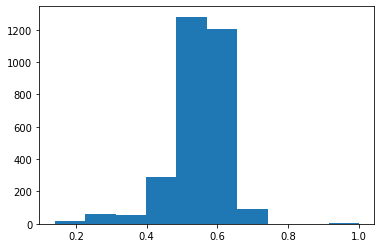

In [66]:
import matplotlib.pyplot as plt

# Then we show them in a histogram
plt.hist(love_similarities)

The few cases with similarity 1 are probably the word `love` itself, that was probably (I didn't check) also in the list of common nouns/verbs. Notice also how there were no negative similarities.

Finally, if we look at this histogram, we may conclude that `love` is more similar to `hate` than it is to most other words. This may sound surprising. 

Let's try out another word:

(array([  13.,   49.,   45.,  112.,  412., 1434.,  905.,   28.,    0.,
           2.]),
 array([0.138 , 0.2242, 0.3104, 0.3966, 0.4828, 0.569 , 0.6552, 0.7414,
        0.8276, 0.9138, 1.    ]),
 <a list of 10 Patch objects>)

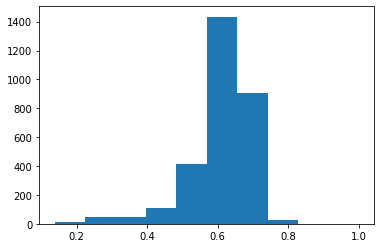

In [68]:
hate_similarities = [similarity('fire', w) for w in nouns + verbs + adjectives]
plt.hist(hate_similarities)

Just like in the previous histogram, the case with similarity 1 are probably `fire` itself. As you can see, however, the peak of this histogram is a little different from that of the word `love`. Last word... let's take a lookt at `horrible`:

(array([  12.,   51.,   49.,   91.,  329.,  954., 1296.,  205.,   10.,
           3.]),
 array([0.127 , 0.2143, 0.3016, 0.3889, 0.4762, 0.5635, 0.6508, 0.7381,
        0.8254, 0.9127, 1.    ]),
 <a list of 10 Patch objects>)

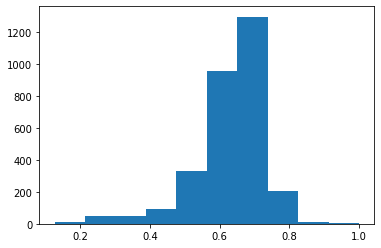

In [69]:
horrible_similarities = [similarity('horrible', w) for w in nouns + verbs + adjectives]
plt.hist(horrible_similarities)

Notice how the peak is again different (this time, 0.7). Somehow, it seems that `horrible` is more similar to the words in our list than `love` or `fire`.

At this point, it may have become clear that our intuitions about these vectors may not really be a good guide to what exactly they represent. The relationships of synonymy/antonymy are clearly not being represented in them, at least the way we would expect. The word `love` is more similar to `hate` than it is to most other words! (and `love` has no similarity higher than 0.8 with any single word in our list of 3000 common English words.) The distribution of similarities is also very varied for the different words, which makes it difficult to guess whether a word counts as "similar" or not just given the cosine similarity.

### What are these vectors representing, then?

You may be wondering, then, what is the use of these vectors? What do they mean, after all? To understand this, I think it is probably useful to look again back into the idea that led us to use these vectors: the Distribution Hypothesis. Remember that the idea behind the Distributional Hypothesis was that words that appear in similar contexts are similar. Consider the following sentences

 1. I love ice-cream
 2. I hate ice-cream
 3. This movie is horrible!
 4. This movie is terrible!
 5. This movie is amazing!
 6. This movie is great!

The examples suggest that the words `love` and `hate` appear in similar contexts, at least in certain ocasions. The examples 3, 4, 5 and 6 suggest the same for `horrible`, `terrible`, `amazing` and `great`. If you think about it, you'll notice that, in most situations, if you can get a sentence with `good`, you can also make the same sentence with `bad`. In other words, according to the Distributional Hypothesis, the meaning of these words **is** similar. Therefore, these vectors **should** be similar, and it is to be expected that `love` and `hate` are really similar words.

The other strange behavior we saw were how those peaks of the histogram varied for different words. Now... let's run a few more of those histograms, just to check something:

(array([  12.,   50.,   55.,  125.,  478., 1319.,  867.,   89.,    2.,
           3.]),
 array([0.147 , 0.2323, 0.3176, 0.4029, 0.4882, 0.5735, 0.6588, 0.7441,
        0.8294, 0.9147, 1.    ]),
 <a list of 10 Patch objects>)

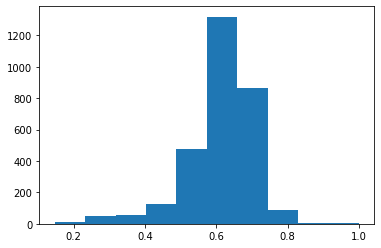

In [70]:
plt.hist([similarity('terrible', w) for w in nouns + verbs + adjectives])

(array([  10.,   35.,   62.,  121.,  493., 1370.,  839.,   65.,    2.,
           3.]),
 array([0.121 , 0.2089, 0.2968, 0.3847, 0.4726, 0.5605, 0.6484, 0.7363,
        0.8242, 0.9121, 1.    ]),
 <a list of 10 Patch objects>)

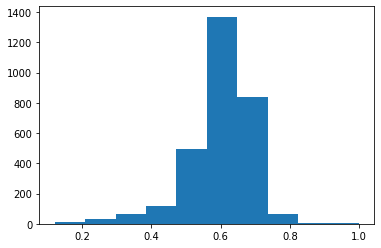

In [71]:
plt.hist([similarity('awful', w) for w in nouns + verbs + adjectives])

(array([1.400e+01, 6.600e+01, 7.000e+01, 2.500e+02, 8.430e+02, 1.347e+03,
        3.730e+02, 3.600e+01, 0.000e+00, 1.000e+00]),
 array([0.139 , 0.2251, 0.3112, 0.3973, 0.4834, 0.5695, 0.6556, 0.7417,
        0.8278, 0.9139, 1.    ]),
 <a list of 10 Patch objects>)

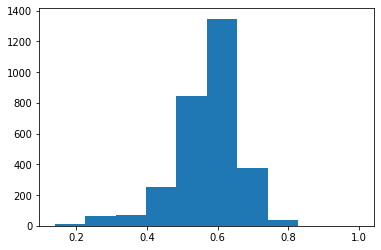

In [72]:
plt.hist([similarity('great', w) for w in nouns + verbs + adjectives])

(array([   6.,   37.,   51.,   59.,  169.,  452.,  936., 1060.,  205.,
          25.]),
 array([0.124 , 0.1988, 0.2736, 0.3484, 0.4232, 0.498 , 0.5728, 0.6476,
        0.7224, 0.7972, 0.872 ]),
 <a list of 10 Patch objects>)

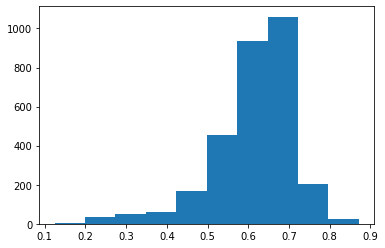

In [73]:
plt.hist([similarity('awesome', w) for w in nouns + verbs + adjectives])

At the time I'm writing this, those lines are executing (they take quite a while to run). I have a hypothesis: that negative words (words that express negative feelings) will have a histogram whose "peak" is at a higher similarity rate than words with a positive feeling.

The reason for this hypothesis comes [from this paper](https://www.researchgate.net/profile/Jean_Marc_Dewaele2/publication/249024475_Languages_and_Emotions_A_Crosslinguistic_Perspective/links/567bfccb08ae19758383a2c9/Languages-and-Emotions-A-Crosslinguistic-Perspective.pdf#page=176): apparently, there are more negative words in English (and, maybe, in several languages) than positive words. This seems to be the case, even though [positive words are used more often](https://link.springer.com/article/10.1140/epjds3). If that is the case, then negative words should have more "neighbors", i.e., there should be more words that appear in similar (negative) contexts.

(well... now they stopped running, and they don't seem to fit this hypothesis. I'd be happy if anyone suggests any other ideas)

So... what is the point of this discussion? I think that the "take home message" is that, even though these vectors may not be intuitive, and may have some biases, they may still carry some sort of information about each of these words, that may help us solve certain tasks. For example, consider the following paragraph (taken from Kristina Kolesova's Master Thesis, showing how compounds are generally used in scientific text):

> _Correct feeder choices were rewarded with sucrose solution. No reward was given for incorrect choices. In contrast to the Competitive Choice Task, the probability of receiving a reward at a particular feeder was fixed over blocks of 60 trials to either a high or low reward probability. These reward probabilities reversed at the beginning of each block of trials. For example, the left feeder would be the **high reward probability side** on trials 1-60, and would then reverse to become the low reward probability side for trials 61-120._
>
>Wong, S. A., Randolph, S. H., Ivan, V. E., & Gruber, A. J. (2017). Acute Δ-9-tetrahydrocannabinol administration in female rats attenuates immediate responses following losses but not multi-trial reinforcement learning from wins. _Behavioural brain research, 335,_ 136-144.

If we were to manually tag the words in the paragraph that somehow help us to understand easily the compound "high reward probability side", we might tag, among other obvious choices (like "rewarded" and "probabilities"), the word "low" (which somehow suggests that the text will talk about "high" soon). What these vectors do to us is to gives us a more or less objective measure of "semantic relatedness" in this sense.

In [74]:
# These have a quite high similarity:
similarity('high', 'low')

0.769